## 1. Proje Konusu, Amacı ve Veri Seti Açıklaması

### 🔍 Projenin Konusu
Bu projenin konusu, bireylerin çeşitli demografik ve sağlıkla ilgili özelliklerine göre **sağlık sigortası maliyetlerini (charges)** tahmin etmektir. Amaç, bireylerin yaş, cinsiyet, vücut kitle indeksi (BMI), çocuk sayısı, sigara içme durumu ve yaşadığı bölge gibi faktörlerin sağlık sigortası maliyeti üzerindeki etkilerini istatistiksel olarak analiz etmek ve bir **lineer regresyon modeli** oluşturarak bu maliyetleri tahmin etmektir.

### 🎯 Projenin Amacı
- Sağlık sigortası ücretlerini etkileyen faktörleri belirlemek.
- En etkili bağımsız değişkenleri ortaya çıkarmak.
- Lineer regresyon modeli kurarak gelecekteki benzer bireylerin sigorta ücretlerini tahmin edebilmek.
- Güven aralıkları ve hipotez testleri ile istatistiksel olarak sonuçları desteklemek.

### 📊 Değişkenler
Proje kapsamında kullanılan değişkenler aşağıdaki gibidir:

| Değişken Adı | Açıklama | Tür | Rolü |
|--------------|----------|-----|------|
| `age`        | Bireyin yaşı | Sayısal (numerik) | Bağımsız değişken |
| `sex`        | Cinsiyet (male/female) | Kategorik | Bağımsız değişken |
| `bmi`        | Vücut Kitle İndeksi | Sayısal | Bağımsız değişken |
| `children`   | Çocuk sayısı | Sayısal | Bağımsız değişken |
| `smoker`     | Sigara içme durumu (yes/no) | Kategorik | Bağımsız değişken |
| `region`     | Yaşanılan bölge | Kategorik | Bağımsız değişken |
| `charges`    | Sağlık sigortası ücreti | Sayısal | **Bağımlı değişken (Y)** |

> Bu projede `charges` değişkeni bağımlı değişken olarak belirlenmiştir. Diğer tüm değişkenler bağımsız değişken olarak modellenmiştir.

### 📁 Kullanılan Veri Seti Hakkında
Veri seti, sağlık sigortası sistemine kayıtlı 1338 bireye ait demografik ve sağlık bilgilerini içermektedir. Aşağıda veri setine dair genel bilgiler yer almaktadır:

- Toplam Gözlem Sayısı: **1338**
- Eksik Veri: **Yok**
- Sayısal Değişkenler: `age`, `bmi`, `children`, `charges`
- Kategorik Değişkenler: `sex`, `smoker`, `region`

Veri seti, sağlık sigortası analizlerinde yaygın olarak kullanılan ve `insurance.csv` adlı bir dosya olarak sağlanmaktadır. Çalışma kapsamında bu veri seti üzerinde istatistiksel analiz, veri görselleştirme ve makine öğrenmesi yöntemleri uygulanacaktır.


## 2. Gerekli Kütüphanelerin Yüklenmesi

Bu projede veri analizi, görselleştirme, istatistiksel testler ve regresyon modellemesi için çeşitli Python kütüphaneleri kullanılmıştır. Aşağıda kullanılan kütüphaneler ve işlevleri özetlenmiştir:

### 📦 Kullanılan Kütüphaneler

| Kütüphane | Kullanım Amacı |
|-----------|----------------|
| `numpy` | Sayısal işlemler ve matematiksel hesaplamalar için kullanılır. |
| `pandas` | Veri çerçevesi (DataFrame) yapıları üzerinde işlem yapabilmek için kullanılır. Veri okuma, filtreleme, özetleme gibi işlemleri sağlar. |
| `seaborn` | İleri düzey istatistiksel grafikler çizmek için kullanılır. `matplotlib` üzerine kuruludur. |
| `matplotlib.pyplot` | Grafik ve veri görselleştirme işlemleri için kullanılır. |
| `sklearn.linear_model.LinearRegression` | Lineer regresyon modelini oluşturmak için kullanılır. |
| `sklearn.model_selection.train_test_split` | Veriyi eğitim ve test olarak ayırmak için kullanılır. |
| `sklearn.preprocessing.LabelEncoder` | Kategorik verileri sayısal forma dönüştürmek için kullanılır. |
| `sklearn.preprocessing.StandardScaler` | Sayısal verileri standartlaştırmak (ölçeklemek) için kullanılır. |
| `sklearn.metrics` | Modelin performansını değerlendirmek için kullanılan hata ölçütlerini içerir (`MAE`, `MSE`, `R²`). |
| `scipy.stats` | İstatistiksel testler, güven aralıkları ve olasılık dağılımları hesaplamak için kullanılır. |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import scipy.stats as stats

## 3. Veri Setinin Yüklenmesi ve Keşfi

In [2]:
df = pd.read_csv("insurance.csv") # Veri setimizi df değişkenine aktarıyoruz

In [3]:
df.head() # Veri setimizin ilk 5 satırı

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail() # Veri setimizin son 5 satırı

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info() # Veri setimiz hakkında bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum() # Veri setimizde eksik verilerin toplamı

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe() # Veri setimizin açıklaması (4 sayısal veri olduğu için, 4 tane sütun var)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- count: Veri setindeki geçerli (null olmayan) eleman sayısı
- mean: Ortalama
- std: Standart sapma
- min: Minimum değer
- 25%: 1. çeyrek (Q1), yani veri setinin %25'inin altında kalan değer
- 50%: Medyan (Q2), veri setinin ortası
- 75%: 3. çeyrek (Q3), yani veri setinin %75'inin altında kalan değer
- max: Maksimum değer

In [ ]:
df["sex"].value_counts() # Kadın,Erkek Sayısı

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
df["smoker"].value_counts() # Sigara içen,içmeyen sayısı

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
df["region"].value_counts() # Bölgelerdeki insan sayısı

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
sigara_icen_kadin_sayisi = len(df[(df["smoker"] == "yes") & (df["sex"] == "female")]) 
sigara_icen_erkek_sayisi = len(df[(df["smoker"] == "yes") & (df["sex"] == "male")])

print(f"Sigara İçen Kadın Sayısı: {sigara_icen_kadin_sayisi}")
print(f"Sigara İçmeyen Kadın Sayısı: {len(df[df["sex"] == "female"]) - sigara_icen_kadin_sayisi}")
print(f"Sigara İçen Erkek Sayısı: {sigara_icen_erkek_sayisi}")
print(f"Sigara İçmeyen Erkek Sayısı: {len(df[df["sex"] == "male"]) - sigara_icen_erkek_sayisi}")

Sigara İçen Kadın Sayısı: 115
Sigara İçmeyen Kadın Sayısı: 547
Sigara İçen Erkek Sayısı: 159
Sigara İçmeyen Erkek Sayısı: 517


In [12]:
# Kategorik Değişkenler
kategorik = df.select_dtypes(include='object')
print("Kategorik değişkenler:", kategorik.columns.tolist())

Kategorik değişkenler: ['sex', 'smoker', 'region']


In [13]:
# Sayısal Değişkenler
sayisal = df.select_dtypes(include='number')
print("Sayısal değişkenler:", sayisal.columns.tolist())

Sayısal değişkenler: ['age', 'bmi', 'children', 'charges']


## 5. Bağımlı Değişkenin (charges) Ana Kütle Ortalaması İçin Güven Aralığı

Bu bölümde, bağımlı değişken olan `charges` değişkeninin, yani bireylerin sağlık sigortası maliyetlerinin, **ana kütle ortalaması** için %95 güven aralığı hesaplanmıştır.

---

### 📌 İstatistiksel Arka Plan

Bir örneklemden elde edilen ortalamanın, ana kütle ortalamasını tahmin etmek için kullanılabileceği varsayılır. Bu amaçla kullanılan güven aralığı aşağıdaki formülle hesaplanır:

#### Güven Aralığı Formülü (t-dağılımı ile):

$$\bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$$

| Sembol | Anlamı |
|--------|--------|
| $\bar{x}$ | Örneklem ortalaması |
| $t_{\alpha/2, n-1}$ | t-dağılımı kritik değeri |
| $s$ | Örneklem standart sapması |
| $n$ | Örneklem büyüklüğü |

Bu formül, özellikle ana kütle standart sapması bilinmediğinde ve örneklem sayısı nispeten küçükse kullanılır.

In [14]:
# Veriler
charges = df['charges']
n = len(charges)
mean = np.mean(charges)
std_err = stats.sem(charges)  # standard error of the mean
confidence = 0.95

# t-kritik değeri
t_value = stats.t.ppf((1 + confidence) / 2, df=n - 1)

# Güven aralığı hesaplama
margin_of_error = t_value * std_err
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"%{confidence*100:.0f} güven aralığı: ({lower_bound:.2f}, {upper_bound:.2f})")

%95 güven aralığı: (12620.95, 13919.89)


Açıklama:
 - Sağlık sigortası ücretlerinin (charges) ortalaması için hesaplanan güven aralığı, maliyetlerin genellikle hangi düzeylerde seyrettiğini gösterir.

## 6. Bağımlı Değişkenin (charges) Ana Kütle Ortalaması İçin Hipotez Testi

Bu aşamada, sağlık sigortası maliyetlerinin (charges) ortalamasının belirli bir değere eşit olup olmadığı test edilmiştir.

---

### 🧮 Hipotezlerin Belirlenmesi

Bir örnek hipotez testi için, varsayalım ki:

- H₀ (Null Hipotez): μ = 14000 → Ana kütle ortalaması 14,000’dir.
- H₁ (Alternatif Hipotez): μ ≠ 14000 → Ana kütle ortalaması 14,000’den farklıdır.

Bu bir **iki yönlü (two-tailed) t-testi**'dir.

---

### 🧠 Kullanılan Test: Tek Örneklem t-Testi

Tek örneklem t-testi, bir örneklem ortalamasının belirli bir değere (hipotezde belirtilen) eşit olup olmadığını test eder. Test istatistiği aşağıdaki formülle hesaplanır:

$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

| Sembol | Açıklama |
|--------|----------|
| $\bar{x}$ | Örneklem ortalaması |
| $\mu_0$ | Karşılaştırılan sabit değer (örnek: 14,000) |
| $s$ | Örneklem standart sapması |
| $n$ | Örneklem büyüklüğü |

In [15]:
# Hipotez testi için sabit değer
mu_0 = 14000
charges = df['charges']

# t-testi uygulama
t_stat, p_value = stats.ttest_1samp(charges, popmean=mu_0)

print(f"t-istatistiği: {t_stat:.4f}")
print(f"p-değeri: {p_value:.20f}")

# Açıklama: p < 0.05 ise H0 reddedilir, yani ortalama 14000 değildir.

t-istatistiği: -2.2037
p-değeri: 0.02771447275400366894


In [16]:
df["charges"].mean()

13270.422265141257

Açıklama:
- p < 0.05 olduğu için H₀ reddedilir.
- Yani elimizdeki verilere göre, sağlık sigortası ücretlerinin ortalaması 14,000 TL'den istatistiksel olarak anlamlı biçimde farklıdır.
- Sonuç olarak, veri setindeki charges değişkeni için varsayılan ortalama değer doğru kabul edilemez.

## 7. Bağımlı Değişkenin (charges) Ana Kütle Varyansı İçin Güven Aralığı

Bu bölümde, sağlık sigortası maliyetlerinin (charges) varyansına ilişkin %95 güven aralığı hesaplanmıştır. Bu analiz, `charges` değişkeninin ne kadar değişkenlik gösterdiğini ana kütle düzeyinde tahmin etmemize yardımcı olur.

---

### 📌 İstatistiksel Arka Plan

Ana kütle varyansı için güven aralığı aşağıdaki formülle hesaplanır. Bu hesaplamada, örnek varyans ve `ki-kare (χ²)` dağılımı kullanılır:

---

## Güven Aralığı Formülleri

Varyans için güven aralığı aşağıdaki formülle hesaplanır:

$$\left( \frac{(n-1)s^2}{\chi^2_{\alpha/2}}, \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}} \right)$$

### Sembollerin Anlamları

| Sembol | Anlamı |
|---|---|
| $n$ | Örneklem büyüklüğü |
| $s^2$ | Örneklem varyansı |
| $\chi^2$ | Ki-kare dağılımı kritik değerleri |

In [17]:
charges = df['charges']
n = len(charges)
alpha = 0.05  # %95 güven aralığı için

sample_var = np.var(charges, ddof=1)

# Ki-kare kritik değerleri
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Güven aralığı hesaplama
lower_bound = (n - 1) * sample_var / chi2_upper
upper_bound = (n - 1) * sample_var / chi2_lower

print(f"Varyans için %95 güven aralığı: ({lower_bound:.2f}, {upper_bound:.2f})")

Varyans için %95 güven aralığı: (136140721.95, 158436617.10)


Açıklama:
- Güven aralığı geniş olduğu için sigorta ücretlerinin değişkenliği oldukça fazladır.
- Bu sonuç, modelleme sürecinde hata dağılımının yüksek olabileceğine işaret eder.
- Ayrıca, varyansın ana kütlede sabit olmadığını (heteroskedastisite olasılığı) da göz önünde bulundurmak gerekir.

## 8. Bağımlı Değişkenin (charges) Ana Kütle Varyansı İçin Hipotez Testi

Bu bölümde, sağlık sigortası ücretlerinin (`charges`) varyansının belirli bir değere eşit olup olmadığı test edilmiştir.

---

### 🧮 Hipotezlerin Belirlenmesi

Varsayalım ki, sigorta şirketi geçmiş yıllardaki analizlere göre varyansın \( $\sigma^2$ = 100,000,000 \) (100 milyon) olduğunu düşünüyor. Bu durumda hipotezlerimiz şöyle olur:

- **H₀ (Null Hipotez):** \( $\sigma^2$ = 100,000,000 \) → Varyans 100 milyon
- **H₁ (Alternatif Hipotez):** \( $\sigma^2$ $\ne$ 100,000,000 \) → Varyans 100 milyondan farklı

Bu test **iki yönlü (two-tailed)** bir varyans testidir.

---

### 📌 Kullanılan Test: Ki-Kare ($\chi^2$) Varyans Testi

Test istatistiği şu formülle hesaplanır:

$$\chi^2 = \frac{(n - 1) \cdot s^2}{\sigma_0^2}$$

| Sembol | Açıklama |
|---|---|
| $n$ | Örneklem büyüklüğü |
| $s^2$ | Örneklem varyansı |
| $\sigma_0^2$ | Varsayılan (hipotezdeki) varyans değeri |

In [49]:
charges = df['charges']
n = len(charges)
sample_var = np.var(charges, ddof=1)
hypothesized_var = 1e8  # 100,000,000

# Ki-kare test istatistiği
chi2_stat = (n - 1) * sample_var / hypothesized_var

# p-değeri (iki yönlü test olduğu için çarpı 2)
p_value = 2 * min(stats.chi2.cdf(chi2_stat, df=n - 1),1 - stats.chi2.cdf(chi2_stat, df=n - 1))

print(f"χ² istatistiği: {chi2_stat:.4f}")
print(f"p-değeri: {p_value:.15f}")

χ² istatistiği: 1960.7422
p-değeri: 0.000000000000000


Açıklama:
- p < 0.05 olduğu için H₀ hipotezi reddedilir.
- Bu durumda, sağlık sigortası ücretlerinin varyansı 100 milyon değildir, istatistiksel olarak anlamlı bir farklılık vardır.

Bu test, charges değişkenindeki değişkenliğin varsayılan bir değerden sapıp sapmadığını test etmekte kullanılır. Sonuçlar, varyansın 100 milyon değerinden farklı olduğunu güçlü şekilde desteklemektedir. Bu da maliyetlerin oldukça değişken olduğunu ve sabit varsayımına dayalı modellere dikkat edilmesi gerektiğini gösterir.

# 9. Basit Regresyon Analizi

Bu bölümde, sağlık sigortası maliyetlerini (`charges`) tahmin etmek amacıyla çoklu lineer regresyon modeli uygulanmıştır. Modelleme öncesinde bağımlı ve bağımsız değişkenlerin uygun formata getirilmesi için veri ön işleme adımları gerçekleştirilmiştir.

### Regresyon Denklemi

**y = β₀ + β₁ * x₁ + β₂ * x₂ + ... + ε**

- **y** → Bağımlı değişken (tahmin etmek istediğimiz çıktı)
- **x** → Bağımsız değişkenler (girdi verileri)
- **β** → Bağımsız değişkenlerin katsayıları (etki oranı)
- **β₀** → Sabit terim (intercept) veya başlangıç değeri. Bağımsız değişkenlerin tümü sıfır olduğunda, y'nin alacağı değeri temsil eder.
- **ε** → Hata payı (modelin tahmin edemediği kısım)

### MSE (Ortalama Karesel Hata)

**$$MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$**

* $n$ = veri noktalarının sayısı
* $Y_i$ = gözlemlenen değerler
* $\hat{Y}_i$ = tahmini değerler

### MAE (Ortalama Mutlak Hata)

**$$MAE = \frac{\sum_{i=1}^{n} |y_i - x_i|}{n}$$**

* $y_i$ = tahmin
* $x_i$ = doğru değer
* $n$ = toplam veri noktası sayısı

### $R^2$ (Belirlilik Katsayısı)

**$$R^2 = 1 - \frac{SS_{hata}}{SS_{toplam}}$$**

* **$SS_{hata}$ (Residual sum of squares):** Modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkların karelerinin toplamı.
* **$SS_{toplam}$ (Total sum of squares):** Gerçek değerlerin, ortalama gerçek değer etrafındaki toplam farklarının kareleri.

In [19]:
# Yes ve No olduğu için binary hale getirdik
lb = LabelEncoder()
df['smoker'] = lb.fit_transform(df['smoker']) # yes → 1, no → 0
df["sex"] = lb.fit_transform(df["sex"]) # male → 1, female → 0

In [20]:
# Kategorik Verileri Encode Etme (one-hot encoding)
df = pd.get_dummies(df,columns=["region"],drop_first=True) 

In [21]:
# Sayısal Verileri Ölçekleme
scaler = StandardScaler()
df[["age","bmi"]] = scaler.fit_transform(df[["age","bmi"]])

In [22]:
df.head() # Bütün işlemleri yaptıktan sonra veri setimizi kontrol ediyoruz

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,0,1,16884.92400,False,False,True
1,-1.509965,1,0.509621,1,0,1725.55230,False,True,False
2,-0.797954,1,0.383307,3,0,4449.46200,False,True,False
3,-0.441948,1,-1.305531,0,0,21984.47061,True,False,False
4,-0.513149,1,-0.292556,0,0,3866.85520,True,False,False


In [23]:
X = df.drop(columns=["charges"]) # Bağımsız değişkenler
y = df['charges'] # Bağımlı değişken

In [24]:
# Boyutlarını kontrol ediyoruz
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [26]:
# Boyutlarını kontrol ediyoruz
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(268, 8)
(268,)
(1070, 8)
(1070,)


In [27]:
# Modeli Eğitme
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [28]:
# Test Verisinde Tahmin Yapma
y_pred = model.predict(X_test)

In [50]:
# Kendi değerlerim ile test
kullanici = pd.DataFrame([{
    "age": 21,
    "sex": 1,
    "bmi": 23.1,
    "children": 0,
    "smoker": 0,
    "region_northwest": 0,
    "region_southeast": 0,
    "region_southwest": 0
}])

kullanici[["age","bmi"]] = scaler.transform(kullanici[["age","bmi"]]) # ölçeklendiriyoruz
model.predict(kullanici)

array([1233.5170305])

In [30]:
coefficients = model.coef_ # Katsayılar
intercept = model.intercept_ # Sabit Terim

print("Regresyon Denklem Katsayıları;")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"\nIntercept (β₀): {intercept:.2f}")
print(f"\nY = {intercept:.2f} + " + " + ".join([f"{coef:.2f}*{name}" for coef, name in zip(coefficients, X.columns)]))

Regresyon Denklem Katsayıları;
age: 3609.15
sex: -18.59
bmi: 2054.89
children: 425.28
smoker: 23651.13
region_northwest: -370.68
region_southeast: -657.86
region_southwest: -809.80

Intercept (β₀): 8480.44

Y = 8480.44 + 3609.15*age + -18.59*sex + 2054.89*bmi + 425.28*children + 23651.13*smoker + -370.68*region_northwest + -657.86*region_southeast + -809.80*region_southwest


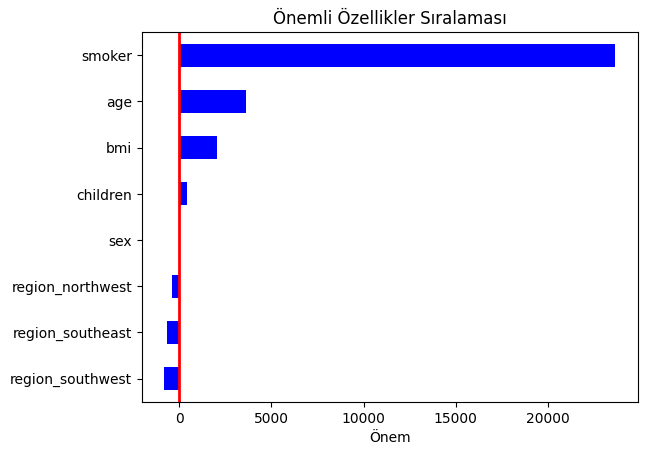

In [32]:
importance_df = pd.Series(coefficients,index=X.columns).sort_values(ascending=True)
importance_df.plot(kind='barh',color="blue")
plt.title(f"Önemli Özellikler Sıralaması")
plt.xlabel("Önem")
plt.axvline(x=0, color='red', linestyle='-', linewidth=2) # Çizgi
plt.show()

In [33]:
ornek_veri = df.sample() # veri setinden rastgele veri
ornek_veri_tahmin = model.predict(ornek_veri.drop(columns=["charges"]))
print(f"Gerçek Değer: {ornek_veri["charges"].values}\nTahmin: {ornek_veri_tahmin}")

Gerçek Değer: [13470.86]
Tahmin: [16405.50339342]


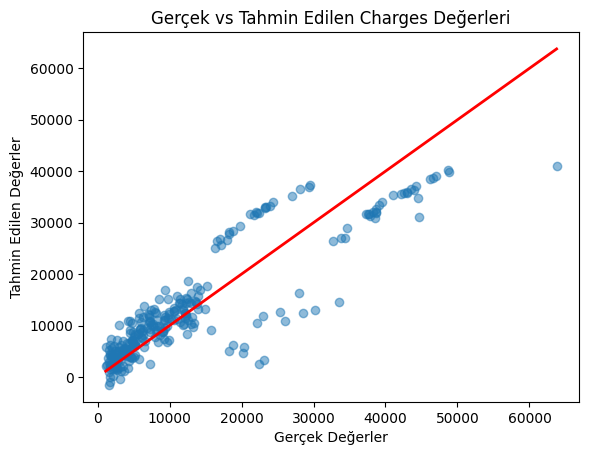

In [34]:
# Teorik değerler (Fitted Values) ve scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Charges Değerleri")
plt.show()

In [35]:
hata_df=pd.DataFrame()
hata_df["y_test"]=y_test
hata_df["y_tahmin"]=y_pred
hata_df

,y_test,y_tahmin
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457
...,...,...
109,47055.53210,39061.500932
575,12222.89830,11761.499198
535,6067.12675,7687.563632
543,63770.42801,40920.291512


In [36]:
hata_df["hata"] = y_test-y_pred
hata_df

,y_test,y_tahmin,hata
764,9095.06825,8969.550274,125.517976
887,5272.17580,7068.747443,-1796.571643
890,29330.98315,36858.410912,-7527.427762
1293,9301.89355,9454.678501,-152.784951
259,33750.29180,26973.173457,6777.118343
...,...,...,...
109,47055.53210,39061.500932,7994.031168
575,12222.89830,11761.499198,461.399102
535,6067.12675,7687.563632,-1620.436882
543,63770.42801,40920.291512,22850.136498


In [ ]:
hata_df["mutlak_hata"]=np.abs(hata_df["hata"]) # MAE (Mean Absolute Error - Ortalama Mutlak Hata)
hata_df

,y_test,y_tahmin,hata,mutlak_hata
764,9095.06825,8969.550274,125.517976,125.517976
887,5272.17580,7068.747443,-1796.571643,1796.571643
890,29330.98315,36858.410912,-7527.427762,7527.427762
1293,9301.89355,9454.678501,-152.784951,152.784951
259,33750.29180,26973.173457,6777.118343,6777.118343
...,...,...,...,...
109,47055.53210,39061.500932,7994.031168,7994.031168
575,12222.89830,11761.499198,461.399102,461.399102
535,6067.12675,7687.563632,-1620.436882,1620.436882
543,63770.42801,40920.291512,22850.136498,22850.136498


In [38]:
hata_df["kare_hata"]=hata_df["hata"]**2 # MSE (Mean Squared Error - Ortalama Kare Hatası)
hata_df

,y_test,y_tahmin,hata,mutlak_hata,kare_hata
764,9095.06825,8969.550274,125.517976,125.517976,1.575476e+04
887,5272.17580,7068.747443,-1796.571643,1796.571643,3.227670e+06
890,29330.98315,36858.410912,-7527.427762,7527.427762,5.666217e+07
1293,9301.89355,9454.678501,-152.784951,152.784951,2.334324e+04
259,33750.29180,26973.173457,6777.118343,6777.118343,4.592933e+07
...,...,...,...,...,...
109,47055.53210,39061.500932,7994.031168,7994.031168,6.390453e+07
575,12222.89830,11761.499198,461.399102,461.399102,2.128891e+05
535,6067.12675,7687.563632,-1620.436882,1620.436882,2.625816e+06
543,63770.42801,40920.291512,22850.136498,22850.136498,5.221287e+08


In [39]:
SS_hata = hata_df["kare_hata"].sum()
SS_toplam = ((y_test - y_test.mean())**2).sum()
R2 = (1 - (SS_hata/SS_toplam))
R2

0.7835929767120723

In [40]:
hata_df.drop(columns=["y_test","y_tahmin"]).mean()

hata          -2.192407e+02
mutlak_hata    4.181194e+03
kare_hata      3.359692e+07
dtype: float64

In [41]:
print("R² Skoru:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Skoru: 0.7835929767120723
MAE: 4181.1944737536505
MSE: 33596915.85136146


# 4. Veri Setinin Grafiklerle Görselleştirilmesi

Bu bölümde, veri setinde yer alan değişkenler görsel olarak incelenmiş ve aralarındaki ilişkiler çeşitli grafiklerle analiz edilmiştir. Görselleştirme işlemleri `seaborn` ve `matplotlib` kütüphaneleri kullanılarak gerçekleştirilmiştir.

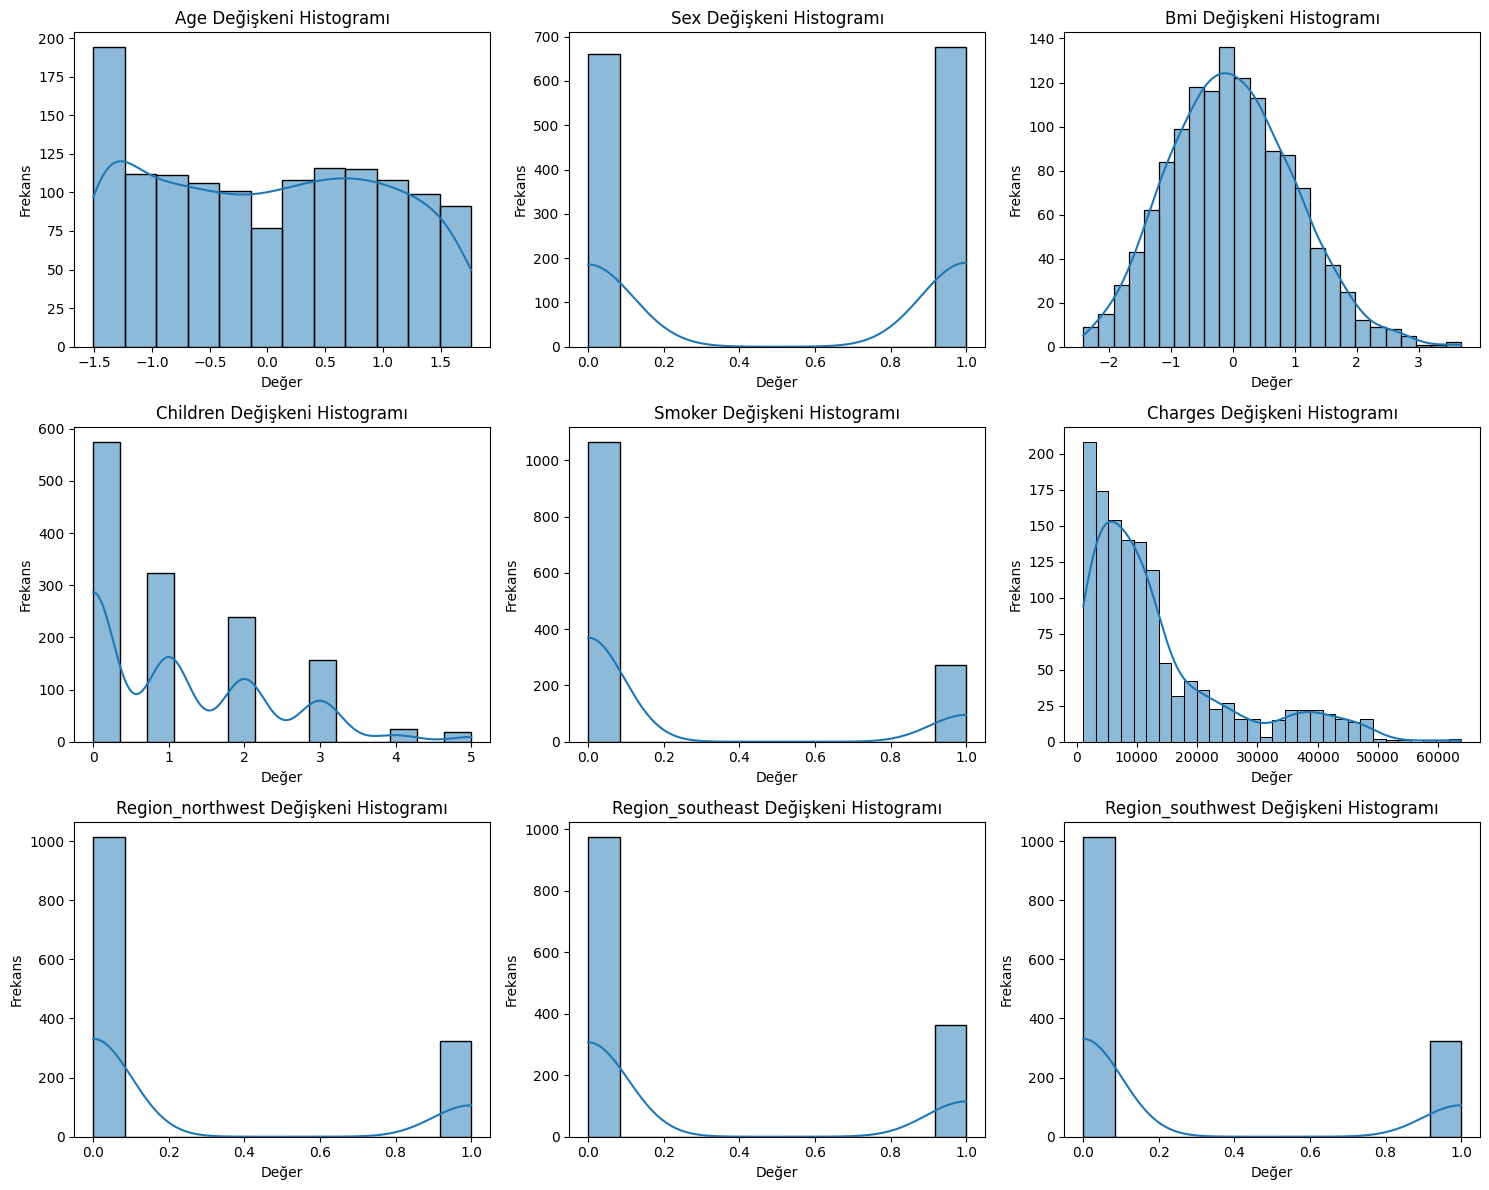

In [42]:
# Örnek: 3x3 şeklinde 9 grafik olacak
n = len(df.columns) # Kaç sütun var

# 3 satır 3 sütun şeklinde alt grafikler
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12)) 

# Eğer sütun sayısı 9'ten fazla ise, o zaman bunu esnetebilirsin
axes = axes.flatten()  # axes'leri düzleştir, böylece daha kolay indeksleyebilirsin

for idx, sütun_ismi in enumerate(df.columns):
    sns.histplot(df[sütun_ismi], kde=True, ax=axes[idx],edgecolor="black")  # ax=axes[idx] ile her grafiği alt grafikte göster
    axes[idx].set_title(sütun_ismi.capitalize() + " Değişkeni Histogramı")
    axes[idx].set_xlabel("Değer")
    axes[idx].set_ylabel("Frekans")

plt.tight_layout()  # Grafiklerin arasındaki boşlukları düzenle
plt.show()

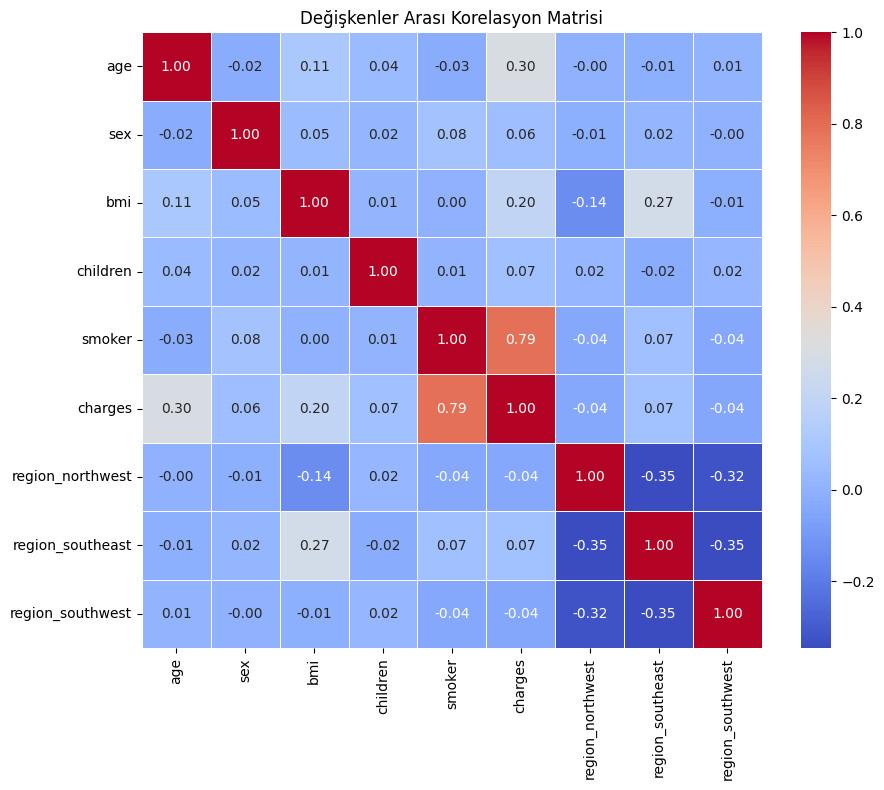

In [43]:
# Korelasyon matrisini oluşturma
correlation_matrix = df.corr()

# Korelasyon matrisinin heatmap ile görselleştirilmesi
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

#charges değişkeninin en çok smoker, age ve bmi ile korelasyon gösterdiği görülmüştür.

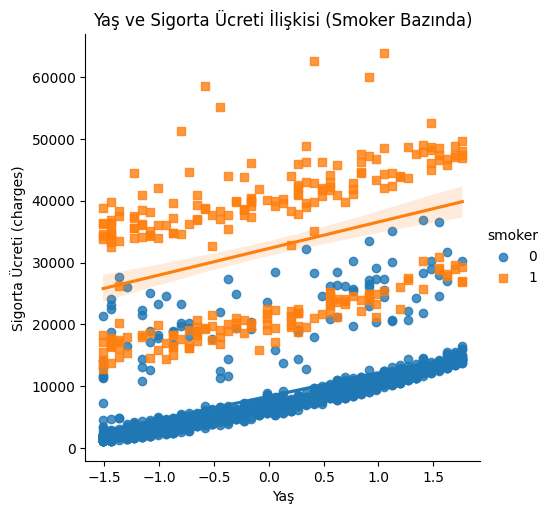

In [44]:
sns.lmplot(x='age', y='charges', data=df, hue='smoker',markers=["o",","])
plt.title("Yaş ve Sigorta Ücreti İlişkisi (Smoker Bazında)")
plt.xlabel("Yaş")
plt.ylabel("Sigorta Ücreti (charges)")
plt.show()

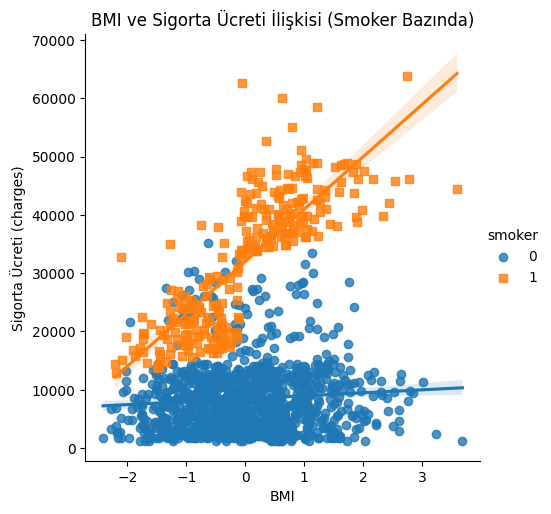

In [45]:
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker',markers=["o",","])
plt.title("BMI ve Sigorta Ücreti İlişkisi (Smoker Bazında)")
plt.xlabel("BMI")
plt.ylabel("Sigorta Ücreti (charges)")
plt.show()
# Scatter plot'lar sigara içmenin (smoker) charges üzerindeki güçlü etkisini açıkça ortaya koymaktadır.
# Özellikle BMI değeri yüksek ve sigara içen bireylerin sigorta ücretlerinin belirgin biçimde arttığı gözlemlenmiştir.

# 10. Tek Yönlü ANOVA Tablosunun Oluşturulması ve Yorumlanması

### 🎯 Amaç
ANOVA (Varyans Analizi), bağımsız değişkenlerin bağımlı değişken üzerindeki etkilerini değerlendirmek için kullanılır. Bu analiz, modeldeki değişkenlerin anlamlı katkılar sağlayıp sağlamadığını test eder.

---

### 🧠 İstatistiksel Arka Plan

ANOVA tablosu aşağıdaki bileşenlerden oluşur:

| Terim | Açıklama |
|-------|----------|
| **SS (Sum of Squares)** | Toplam sapma kareleri |
| **df (degrees of freedom)** | Serbestlik derecesi |
| **MS (Mean Squares)** | Ortalama kare: SS / df |
| **F** | F-istatistiği: MS_regression / MS_residual |
| **p-value** | Anlamlılık düzeyi |

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Tüm verileri tek bir DataFrame içinde birleştir
df_train = X_train.copy()
df_train['target'] = y_train

# Formül belirt — bağımlı değişken: target, bağımsız değişkenler: tüm sütunlar
formula = 'target ~ ' + ' + '.join(X_train.columns)

# OLS modelini formül ile kur
ols_model = ols(formula, data=df_train).fit()

# ANOVA tablosu
anova_table = sm.stats.anova_lm(ols_model, typ=2)
print(anova_table)

                        sum_sq      df            F         PR(>F)
region_northwest  1.792118e+07     1.0     0.476704   4.900699e-01
region_southeast  5.583917e+07     1.0     1.485326   2.232140e-01
region_southwest  8.606508e+07     1.0     2.289337   1.305634e-01
age               1.366732e+10     1.0   363.551560   6.310917e-70
sex               9.182822e+04     1.0     0.002443   9.605915e-01
bmi               4.051613e+09     1.0   107.773172   4.109401e-24
children          2.842736e+08     1.0     7.561696   6.063516e-03
smoker            9.662924e+10     1.0  2570.344251  9.774475e-286
Residual          3.988712e+10  1061.0          NaN            NaN


**sum_sq:** Bağımsız değişkenin model üzerindeki katkısını gösterir.

**df:** Serbestlik derecesini ifade eder.

**F:** Her bir değişkenin bağımlı değişken üzerindeki etkisinin büyüklüğünü gösterir.

**PR(>F):** Anlamlılık testi sonucu olan p-değeri. Eğer p-değeri küçükse, o değişkenin modelde önemli bir rolü olduğunu söyleyebiliriz.

# 11. Yapılan Çalışmanın ve Sonuçların Özeti

Bu projede, bireylerin sağlık sigortası maliyetlerini (`charges`) etkileyen faktörler incelenmiş ve bu doğrultuda istatistiksel analizler ile makine öğrenmesi temelli bir regresyon modeli kurulmuştur. Aşağıda adım adım elde edilen bulgular ve çıkarımlar yer almaktadır:

---

### 📊 Veri Seti Özeti

- Veri seti toplam **1338 gözlem** içermektedir.
- Eksik veri bulunmamaktadır.
- Veri setinde hem **sayısal** (`age`, `bmi`, `children`, `charges`) hem de **kategorik** (`sex`, `smoker`, `region`) değişkenler yer almaktadır.

---

### 🔍 Veri Analizi ve Görselleştirme

- Sayısal değişkenler histogramlar ile incelenmiş, normal dağılıma yakınlıkları değerlendirilmiştir.
- Korelasyon matrisi ve scatter plot'lar sayesinde `smoker`, `age`, `bmi` değişkenlerinin `charges` ile güçlü ilişki içinde olduğu görülmüştür.
- Sigara kullanan bireylerin sigorta ücretlerinin gözle görülür şekilde daha yüksek olduğu tespit edilmiştir.

---

### 🧮 İstatistiksel Analiz Sonuçları

- **Ortalama için güven aralığı (%95):** `charges` değişkeninin ortalaması 12600 – 13900 aralığında bulunmuştur.
- **Ortalama için hipotez testi:** Sigorta ücretlerinin ortalamasının 14,000 TL'den anlamlı şekilde farklı olduğu sonucuna varılmıştır (p < 0.05).
- **Varyans için güven aralığı ve hipotez testi:** Varyansın yüksek ve 100 milyon referans değerinden anlamlı derecede farklı olduğu ortaya konmuştur.

---

### 📈 Regresyon Analizi Sonuçları

- Çoklu lineer regresyon modeli kurulmuş ve veri ön işlemeleri (encoding, scaling) gerçekleştirilmiştir.
- Modelin **R² skoru ≈ 0.78** olarak hesaplanmıştır; yani bağımsız değişkenler `charges` değişkenindeki varyansın yaklaşık %78’ini açıklamaktadır.
- **En önemli etkileyen faktörler:** `smoker`, `age`, `bmi`
- Regresyon denklemi çıkarılmış, hata metrikleri (MAE, MSE) hesaplanmıştır.

---

### 📊 ANOVA Sonuçları

- ANOVA tablosu yardımıyla `smoker`, `age` ve `bmi` değişkenlerinin istatistiksel olarak anlamlı olduğu görülmüştür.
- Bazı değişkenlerin (`sex`, `region`) modelde anlamlı katkı sunmadığı saptanmıştır.

---

### ✅ Genel Yorum ve Öneriler

- Modelleme sonucunda sigara içmenin sağlık sigortası ücretleri üzerinde ciddi bir etkisi olduğu doğrulanmıştır. Bu bulgu, sigorta primlerinin belirlenmesinde doğrudan kullanılabilir.
- Model, lineer yapıya dayalıdır. Daha iyi doğruluk için **non-lineer modeller (Random Forest, XGBoost, vb.)** ile karşılaştırmalı çalışmalar yapılabilir.
- Model artıklarının (residuals) normal dağılıma uygunluğu ve sabit varyans varsayımı ayrıca test edilerek modelin sağlamlığı artırılabilir.
- Özellik seçimi (feature selection) ve model sadeleştirme süreçleriyle daha kompakt ve açıklayıcı modeller elde edilebilir.

---

### 📌 Son Söz

Bu proje kapsamında yapılan analizler, veri bilimi projelerinde izlenecek sistematik yaklaşımı ortaya koymuştur: veri keşfi → görselleştirme → istatistiksel testler → modelleme → yorumlama. Bulgular sigorta sektöründe politika oluşturma ve fiyatlandırma kararlarında destekleyici nitelikte olabilir.
